
## Analyzing Global COVID-19 Data in Python

### Data Source: 


The data is downloaded from European Centre for Disease Prevention and Control.

In [1]:
%matplotlib inline
import pandas

## Importing Data from S3

In [2]:
df = pandas.read_excel('s3://mays-ia241/COVID-19-geographic-disbtribution-worldwide_April_10_2020.xlsx')
df[:10] #the top 10 rows

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-10,10,4,2020,61,1,Afghanistan,AF,AFG,37172386.0
1,2020-04-09,9,4,2020,56,3,Afghanistan,AF,AFG,37172386.0
2,2020-04-08,8,4,2020,30,4,Afghanistan,AF,AFG,37172386.0
3,2020-04-07,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0
4,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
5,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
6,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
7,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
8,2020-04-02,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0
9,2020-04-01,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0


# Analysis

## 1. Sum Of Deaths Per Day Globally 

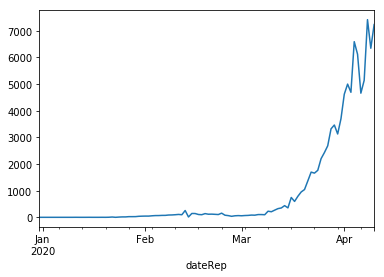

In [5]:
sum_death_by_date = df.groupby('dateRep').sum()['deaths']

sum_death_by_date.plot()

This chart allows us to see that over the months, death rates have ultimatley risen. You can also see that from January to March, death rates were consitent until they sharply rose mid-March and into April. 

## 2. The Top 15 Countries with the Highest Amount of Cases 

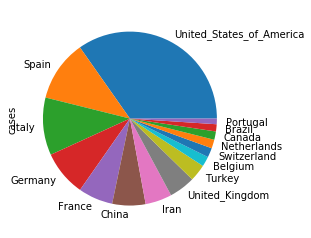

In [16]:
sum_cases_by_country = df.groupby('countriesAndTerritories').sum()['cases']

sum_cases_by_country.nlargest(15).plot.pie()


This Pie Chart represents the Top 15 coutries with the most COVIS-19 cases. It is clear that the USA has the most cases, followed by Spain and Italy. 

## 3. Looking at China's Data

In [11]:
china_data = df.loc[df['countriesAndTerritories'] == 'China']
china_data[:10] #the top 10 rows

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
1927,2020-04-10,10,4,2020,55,1,China,CN,CHN,1.392730e+09
1928,2020-04-09,9,4,2020,86,2,China,CN,CHN,1.392730e+09
1929,2020-04-08,8,4,2020,86,2,China,CN,CHN,1.392730e+09
1930,2020-04-07,7,4,2020,56,0,China,CN,CHN,1.392730e+09
1931,2020-04-06,6,4,2020,67,2,China,CN,CHN,1.392730e+09
1932,2020-04-05,5,4,2020,48,3,China,CN,CHN,1.392730e+09
1933,2020-04-04,4,4,2020,62,4,China,CN,CHN,1.392730e+09
1934,2020-04-03,3,4,2020,70,10,China,CN,CHN,1.392730e+09
1935,2020-04-02,2,4,2020,100,6,China,CN,CHN,1.392730e+09
1936,2020-04-01,1,4,2020,54,1,China,CN,CHN,1.392730e+09


## 4. Number of cases in China related to their deaths

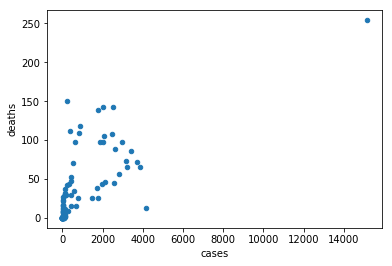

In [15]:
china_data.plot.scatter(x='cases',y='deaths')

This graph shows the relationship between the number of cases and deaths in China. However, I think it better highlights the confusion and possible deception surrounding the true number of cases and deaths in China


## 5. The Sum of Cases in China per Day

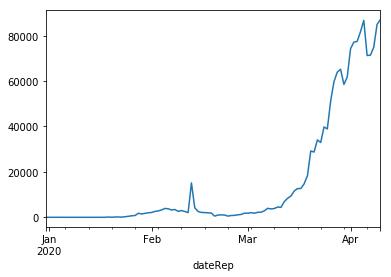

In [18]:
china_data = df.groupby('dateRep').sum()['cases']
china_data.plot()

This chart shows that the most cases were from the months of March and April 